

# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### The dataset <a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments/data"> Medical Appointment No Shows </a> collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
### Dataset Description 
#### 01 - PatientId : Identification of a patient
#### 02 - AppointmentID :Identification of each appointment
#### 03 - Gender:Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
#### 04 - SchedualDay:The day of the actuall appointment, when they have to visit the doctor.
#### 05 - AppointmentDay:The day someone called or registered the appointment, this is before appointment of course.
#### 06 - Age:How old is the patient.
#### 07 - Neighbourhood :Where the appointment takes place.
#### 08 - Scholarship :True of False .
#### 09 - Hipertension:True or False
#### 10 - Diabetes :True or False
#### 11 - Alcoholism:True or False
#### 12 - Handcap: True or False
#### 13 - SMS_received: True or Fasle.
#### 14 - No-show : True or False.



### Question(s) for Analysis
#### 1- Does the Gender affect in No-Shows (which Gender Shows more? ) ? 
#### 2-What are the most common ages for attending appointments?
#### 3- how the SMS affect on No-Show ? 
#### 4-What is the average age of patients who has a Diabetes?

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [3]:
df= pd.read_csv('noshowappointments.csv')

In [4]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.rename(columns={'Hipertension' :'Hypertension' , 'Handcap' : 'Handicap' ,'SMS_received':'SMSreceived', 'No-show' :'NoShow'}, inplace=True)

In [8]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMSreceived     110527 non-null  int64  
 13  NoShow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.shape

(110527, 14)

In [11]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMSreceived         int64
NoShow             object
dtype: object

In [12]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMSreceived            2
NoShow                 2
dtype: int64

In [13]:
df.isnull().sum() 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSreceived       0
NoShow            0
dtype: int64

### there is no missing values in our dataset


In [14]:
df.duplicated().sum()

0


### Data Cleaning


In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
# in 'Age' column there is a '-1' value this is illogical 
# check where is the Age = -1 and drop this row 
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
#drop the row with value Age=-1 
df.drop(index=99832,inplace=True)

In [18]:
#ensure that the row is dropped
df[df['Age'] == -1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow


In [19]:
df.describe() # the min of Age column now is 0 not -1 

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [20]:
# convert dtype for 'AppointmentDay' from object to dateTime 
# and extract time 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentTime'] = df['AppointmentDay'].dt.time
df['AppointmentTime']

0         00:00:00
1         00:00:00
2         00:00:00
3         00:00:00
4         00:00:00
            ...   
110522    00:00:00
110523    00:00:00
110524    00:00:00
110525    00:00:00
110526    00:00:00
Name: AppointmentTime, Length: 110526, dtype: object

#### As we noticed all time of Appointment is '00:00:00' lets check that 

In [21]:
# check if all time in AppointmentDay is 00:00:00
zero_time = (df['AppointmentTime'] == pd.to_datetime('00:00:00').time()).all()
print(zero_time)


True


### so we want to extract only date and delete all time because its 00:00:00 ( it doesnt affect in our result) from AppointmentDay column and create a new column with name AppointmentDate 

In [22]:
df['AppointmentDate'] = df['AppointmentDay'].dt.date
df=df.drop(columns=['AppointmentTime','AppointmentDay'] )

In [23]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,AppointmentDate
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        110526 non-null  float64
 1   AppointmentID    110526 non-null  int64  
 2   Gender           110526 non-null  object 
 3   ScheduledDay     110526 non-null  object 
 4   Age              110526 non-null  int64  
 5   Neighbourhood    110526 non-null  object 
 6   Scholarship      110526 non-null  int64  
 7   Hypertension     110526 non-null  int64  
 8   Diabetes         110526 non-null  int64  
 9   Alcoholism       110526 non-null  int64  
 10  Handicap         110526 non-null  int64  
 11  SMSreceived      110526 non-null  int64  
 12  NoShow           110526 non-null  object 
 13  AppointmentDate  110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


### Data Types optimization


In [25]:
#convert 'ScheduledDay' and 'AppointmentDate' from object to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDate']= pd.to_datetime(df['AppointmentDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110526 non-null  float64            
 1   AppointmentID    110526 non-null  int64              
 2   Gender           110526 non-null  object             
 3   ScheduledDay     110526 non-null  datetime64[ns, UTC]
 4   Age              110526 non-null  int64              
 5   Neighbourhood    110526 non-null  object             
 6   Scholarship      110526 non-null  int64              
 7   Hypertension     110526 non-null  int64              
 8   Diabetes         110526 non-null  int64              
 9   Alcoholism       110526 non-null  int64              
 10  Handicap         110526 non-null  int64              
 11  SMSreceived      110526 non-null  int64              
 12  NoShow           110526 non-null  object             
 13  Appo

In [26]:
df['Neighbourhood'].value_counts()

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

### the length of Neighbourhood column is too large we cant cotegorize it 

In [27]:
df['Handicap'].value_counts()

Handicap
0    108285
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [28]:
df['Gender'].value_counts()

Gender
F    71839
M    38687
Name: count, dtype: int64

In [29]:
df['SMSreceived'].value_counts()

SMSreceived
0    75044
1    35482
Name: count, dtype: int64

In [30]:
# convert 'Handicap' and 'Gender' to categorical 
df['Handicap'] = df['Handicap'].astype("category")
df['Gender'] = df['Gender'].astype("category")


In [31]:
# convert 'scholarship' , 'Hypertension' , ' Diabetes' , 'Alcoholism' and 'SMSreceived' from int64 to boolean 
for c in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMSreceived']:
    df[c] = df[c].astype('bool')

In [32]:
df['NoShow'].value_counts()

NoShow
No     88207
Yes    22319
Name: count, dtype: int64

In [33]:
#convert No_Show from int to bool 
df['No_Show']= df['NoShow'].astype("bool")

In [34]:
#check all converting dtypes
df.dtypes

PatientId                      float64
AppointmentID                    int64
Gender                        category
ScheduledDay       datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                       bool
Hypertension                      bool
Diabetes                          bool
Alcoholism                        bool
Handicap                      category
SMSreceived                       bool
NoShow                          object
AppointmentDate         datetime64[ns]
No_Show                           bool
dtype: object

In [35]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,AppointmentDate,No_Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No,2016-04-29,True
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,No,2016-04-29,True
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,No,2016-04-29,True
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No,2016-04-29,True
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,No,2016-04-29,True


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110526 non-null  float64            
 1   AppointmentID    110526 non-null  int64              
 2   Gender           110526 non-null  category           
 3   ScheduledDay     110526 non-null  datetime64[ns, UTC]
 4   Age              110526 non-null  int64              
 5   Neighbourhood    110526 non-null  object             
 6   Scholarship      110526 non-null  bool               
 7   Hypertension     110526 non-null  bool               
 8   Diabetes         110526 non-null  bool               
 9   Alcoholism       110526 non-null  bool               
 10  Handicap         110526 non-null  category           
 11  SMSreceived      110526 non-null  bool               
 12  NoShow           110526 non-null  object             
 13  Appo

### Notice that the memory size reduced from 11.6 to 7.6 after converting data types for columns


<a id='eda'></a>
## Exploratory Data Analysis




### 1- Does the Gender affect in No-Shows (which Gender Shows more? ) ? 

In [102]:
def bar_chart(df, groupby_cols, plot_title, xlabel, ylabel, legend_title=None, rotation=0):
    # Group by specified columns and count occurrences
    grouped_data = df.groupby(groupby_cols).size().unstack()
    # Plot the data
    grouped_data.plot(kind='bar', stacked=True)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend_title:
        plt.legend(title=legend_title)
    plt.xticks(rotation=rotation)
    plt.show()

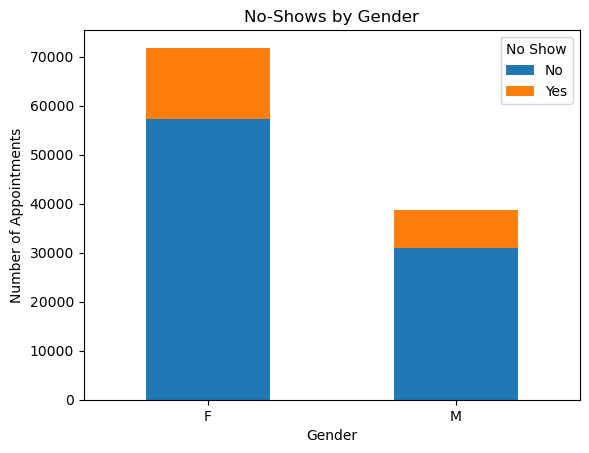

In [103]:
bar_chart(
    df,
    groupby_cols=['Gender', 'NoShow'],
    plot_title='No-Shows by Gender',
    xlabel='Gender',
    ylabel='Number of Appointments',
    legend_title='No Show'
)

#### this a No-Show by Gender plot show that number of Appointment according Gender and its clearly seem  the No-Show = No for females is more than males that mean the female attend appointment more than males .

### 2-What are the most common ages for attending appointments?

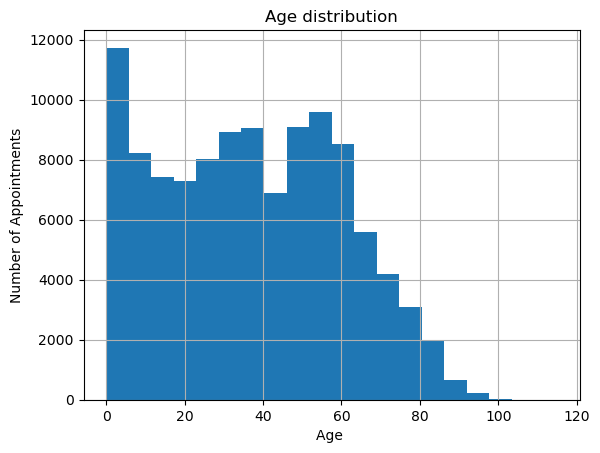

In [47]:
# first lets take a look in age distribution 
g =df.Age.hist(bins=20);
plt.title('Age distribution')
plt.xlabel('Age ')
plt.ylabel('Number of Appointments')
plt.show()


#### this is a simple  Age distribution plot for patients  Ages and the number of Appointment 

In [52]:
# then Create age groups
bins = [0, 20, 40, 60,  80, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '81-120']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

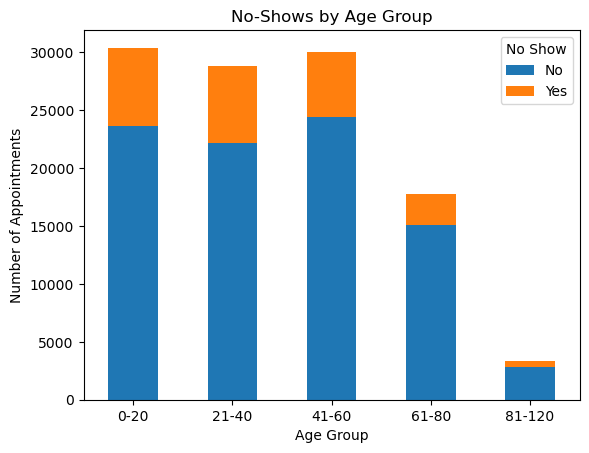

In [104]:
bar_chart(
    df,
    groupby_cols=['AgeGroup', 'NoShow'],
    plot_title='No-Shows by Age Group',
    xlabel='Age Group',
    ylabel='Number of Appointments',
    legend_title='No Show',
    rotation=0
)

#### the No-Show by Age Group Plot show the attendece for the different Ages and as shown in the figure I slices the Age Column to periods the length of each period is 20 to make it easy and readable for the results and as you see in the plot the most ages that attend the appointment is for young patient 0-20 years old then for adult patients and finally for Elderly patient .

### 3- how the SMS affect on No-Show ? 

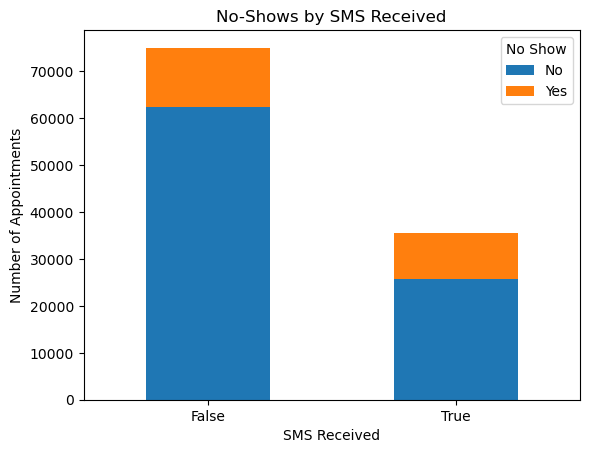

In [105]:
bar_chart(
    df,
    groupby_cols=['SMSreceived', 'NoShow'],
    plot_title='No-Shows by SMS Received',
    xlabel='SMS Received',
    ylabel='Number of Appointments',
    legend_title='No Show'
)

#### the plot is clearly explain the relation betwwen the SMS_received column and the No_Show , as you see the blue chart is the No_show with value No thats mean (the patient who attend the appointment) and the orange color is for No_show=yes values wich means (the patient who did not attend the appointment) .

### 4-What is the average age of patients who has a Diabetes?

In [93]:
Diabetes_Age=df.groupby('Diabetes')['Age'].mean().reset_index()
Diabetes_Age

,Diabetes,Age
0,False,35.208962
1,True,61.372529


Text(0.5, 0, 'Diabetes ')

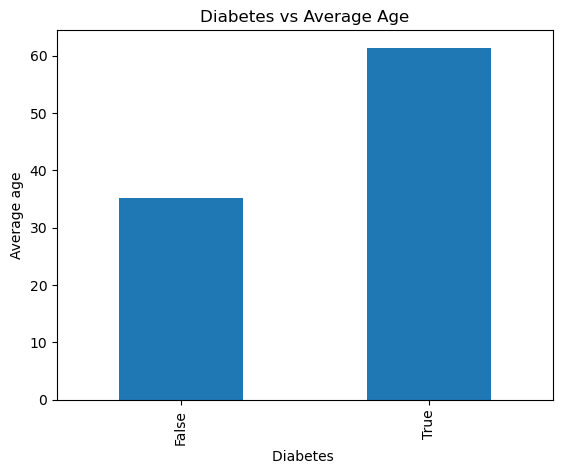

In [107]:
df.groupby('Diabetes')['Age'].mean().plot(kind='bar')
plt.title('Diabetes vs Average Age')
plt.ylabel('Average age')
plt.xlabel('Diabetes ')


#### this plot show the average age of patient who has diabetes and dont has diabetes as you see the diabetes is a boolean variable which has two values True (the patient who has diabetes ) and False (the Patient who dont have a Diabetes ) this is in the x-axis but in the y-axis as you see we put the average age calculated by groupby() and mean() methods . 

<a id='conclusions'></a>
## Conclusions




### 1- Does the Gender affect in No-Shows (which Gender Shows more? ) ?


####  Gender does Affet on No_Show , the female patient has more number of No_Show than Male but thats due to the largest number of appointment for Female than Male .

### 2-What are the most common ages for attending appointments?
#### it seems that the patient in the  Age period from [0-20] and [41-60] has attend appointments more than others  

### 3- how the SMS affect on No-Show ? 
#### The SMS is helpful to reduce a no-show , overall the appointment with SMS_recieved has lower no show number than without SMS_recieved  

### 4- What is the average age of patients with Diabetes ?
#### the averge Age of patients who has a Diabetes is around 61 and who dont has a Diabetes is 35 

### Limitations : there are many limitations of this data analysis project i will mentioned few of them


#### 1- lack of numerical variables : most of columns in the dataset are boolean or objects there is no numerical values to do some statistical calculations like mean,meadian,mode,std and variance so we can't plot more charts just a bar or histogram ( just an Age column is numerical ) 

#### 2- Generalizability : the data is specific to a particular region which in Brazil , which may not be representative of other regions or systems.

#### 3- Privacy and Ethical Concerns: the patient privacy and compliance with data protection regulations can restrict the level of detail available for analysis . 


In [98]:
df.to_csv("No_Show_Final.csv",index=False)

In [99]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 822148 bytes to Investigate_a_Dataset.html
